<a href="https://colab.research.google.com/github/kesa955/major_project/blob/cnn/Copy_of_Breast_Cancer_Survival_Prediction_using_Gene_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys

LOAD DATA

In [128]:
df = pd.read_csv("METABRIC_RNA_Mutation.csv", low_memory = False)
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [129]:
clinical_data = df.loc[:, df.columns[:31]]
clinical_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [130]:
gene_data = df.loc[:, df.columns[31:]]
gene_data.head()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,0,0,0,0,0,0,0,0,0,0
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0,0,0,0,0,0,0,0,0,0
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,0,0,0,0,0,0,0,0,0,0
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,0,0,0,0,0,0,0,0,0,0
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,0,0,0,0,0,0,0,0,0,0


DATA PRE-PROCESSING

In [131]:
#Finding missing data and the percentage of it in each column
total = clinical_data.isnull().sum().sort_values(ascending = False)
percent = (clinical_data.isnull().sum() / clinical_data.isnull().count()).sort_values(ascending=False)
missing_clinical = pd.concat([total, percent], axis = 1, keys = ['total_null', 'percent_null'])
missing_clinical.head(14)

,total_null,percent_null
tumor_stage,501,0.263130
3-gene_classifier_subtype,204,0.107143
primary_tumor_laterality,106,0.055672
neoplasm_histologic_grade,72,0.037815
cellularity,54,0.028361
mutation_count,45,0.023634
er_status_measured_by_ihc,30,0.015756
type_of_breast_surgery,22,0.011555
tumor_size,20,0.010504
cancer_type_detailed,15,0.007878


In [132]:
#Finding missing data and the percentage of it in each column
total = gene_data.isnull().sum().sort_values(ascending = False)
percent = (gene_data.isnull().sum() / gene_data.isnull().count()).sort_values(ascending=False)
missing_gene = pd.concat([total, percent], axis = 1, keys = ['total_null', 'percent_null'])
missing_gene.head()

,total_null,percent_null
brca1,0,0.0
bche,0,0.0
cdkn2c,0,0.0
cyb5a,0,0.0
cyp11a1,0,0.0


TOTAL NULL IN CLINICAL DATA

In [133]:
total = 0
for i in missing_clinical['total_null']:
    total += i
print(total)

1100


In [134]:
clinical_data.shape

(1904, 31)

## Filling the Missing Values
Since we have 1100 missing values, we should fill in instead of drop out.

# Visualize the Columns w/ Missing Values

In [ ]:
for missing_column in missing_clinical.index[:13]:
    df[missing_column].value_counts().plot.bar()
    print(missing_column)

In [10]:
# for column in missing_clinical.index[:13]:
#     df[column].fillna(df[column].mode()[0], inplace=True)
# neoplasm_histologic_grade        1 to 3
# tumor_stage                      1 to 182
# mutation_count                   1 to 80
# tumor_size                       0 to 4

# 3-gene_classifier_subtype        ER+/HER2- Low Prolif,ER+/HER2- High Prolif,ER-/HER2-
# primary_tumor_laterality         left,right
# cellularity                      High,moderate,low
# cancer_type_detailed             Breast Invasive Ductal Carcinoma,Breast Mixed Ductal and Lobular Carcinoma Breast,Invasive Lobular Carcinoma
# tumor_other_histologic_subtype   Ductal/NST,Mixed,Lobular
# oncotree_code                    IDC,MDLC,ILC
# death_from_cancer                Living,Died of Disease,Died of Other Causes
# er_status_measured_by_ihc        positive,negative
# type_of_breast_surgery           Category: MASTECTOMY,BREAST CONSERVING

In [143]:
df['neoplasm_histologic_grade'] = df['neoplasm_histologic_grade'].replace(np.NaN,df['neoplasm_histologic_grade'].mean())
df['tumor_stage'] = df['tumor_stage'].replace(np.NaN,df['tumor_stage'].mean())
df['mutation_count'] = df['mutation_count'].replace(np.NaN,df['mutation_count'].mean())
df['tumor_size'] = df['tumor_size'].replace(np.NaN,df['tumor_size'].mean())

for column in ['3-gene_classifier_subtype','primary_tumor_laterality','cellularity','cancer_type_detailed','tumor_other_histologic_subtype','oncotree_code','er_status_measured_by_ihc','type_of_breast_surgery','death_from_cancer']:
  df[column].fillna(df[column].mode()[0], inplace=True)
# df['3-gene_classifier_subtype'] = df['3-gene_classifier_subtype'].fillna('ER+/HER2- Low Prolif')
df.isnull().sum().sum()



0

# Drop Columns & Value Counts & Interpreting Data

In [144]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [145]:
for column in df.columns:
    unique_values = np.unique(df[column])


# Label Encoding (ORDINAL)

In [146]:
ordinal_df = df[['cellularity','type_of_breast_surgery',
                       'her2_status_measured_by_snp6','pam50_+_claudin-low_subtype',
                       'her2_status_measured_by_snp6','tumor_other_histologic_subtype',
                       'integrative_cluster','3-gene_classifier_subtype','death_from_cancer']]
ordinal_df.head()

,cellularity,type_of_breast_surgery,her2_status_measured_by_snp6,pam50_+_claudin-low_subtype,her2_status_measured_by_snp6,tumor_other_histologic_subtype,integrative_cluster,3-gene_classifier_subtype,death_from_cancer
0,High,MASTECTOMY,NEUTRAL,claudin-low,NEUTRAL,Ductal/NST,4ER+,ER-/HER2-,Living
1,High,BREAST CONSERVING,NEUTRAL,LumA,NEUTRAL,Ductal/NST,4ER+,ER+/HER2- High Prolif,Living
2,High,MASTECTOMY,NEUTRAL,LumB,NEUTRAL,Ductal/NST,3,ER+/HER2- Low Prolif,Died of Disease
3,Moderate,MASTECTOMY,NEUTRAL,LumB,NEUTRAL,Mixed,9,ER+/HER2- Low Prolif,Living
4,High,MASTECTOMY,NEUTRAL,LumB,NEUTRAL,Mixed,9,ER+/HER2- High Prolif,Died of Disease


In [147]:
from sklearn.preprocessing import LabelEncoder
# creating initial dataframe
ordinal_df = ordinal_df.apply(LabelEncoder().fit_transform)
ordinal_df.head()

,cellularity,type_of_breast_surgery,her2_status_measured_by_snp6,pam50_+_claudin-low_subtype,her2_status_measured_by_snp6,tumor_other_histologic_subtype,integrative_cluster,3-gene_classifier_subtype,death_from_cancer
0,0,1,2,6,2,0,4,2,2
1,0,0,2,2,2,0,4,0,2
2,0,1,2,3,2,0,3,1,0
3,2,1,2,3,2,4,10,1,2
4,0,1,2,3,2,4,10,0,0


# One-Hot Encoding (NOMINAL)

In [148]:
nominal_df = df[['er_status_measured_by_ihc','er_status', 'her2_status', 'inferred_menopausal_state',
                'primary_tumor_laterality', 'pr_status', 'oncotree_code']]
nominal_df.head()

,er_status_measured_by_ihc,er_status,her2_status,inferred_menopausal_state,primary_tumor_laterality,pr_status,oncotree_code
0,Positve,Positive,Negative,Post,Right,Negative,IDC
1,Positve,Positive,Negative,Pre,Right,Positive,IDC
2,Positve,Positive,Negative,Pre,Right,Positive,IDC
3,Positve,Positive,Negative,Pre,Right,Positive,MDLC
4,Positve,Positive,Negative,Post,Right,Positive,MDLC


In [149]:
nominal_df = pd.get_dummies(data = nominal_df, drop_first= True)
nominal_df.head()

,er_status_measured_by_ihc_Positve,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,1,1,0,0,1,0,1,0,0,0,0
1,1,1,0,1,1,1,1,0,0,0,0
2,1,1,0,1,1,1,1,0,0,0,0
3,1,1,0,1,1,1,0,0,0,0,1
4,1,1,0,0,1,1,0,0,0,0,1


In [150]:
df.drop(ordinal_df.columns, axis = 1, inplace = True)
df = df.join(ordinal_df)
df.head()

,patient_id,age_at_diagnosis,cancer_type,cancer_type_detailed,chemotherapy,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status,...,siah1_mut,cellularity,type_of_breast_surgery,her2_status_measured_by_snp6,pam50_+_claudin-low_subtype,her2_status_measured_by_snp6,tumor_other_histologic_subtype,integrative_cluster,3-gene_classifier_subtype,death_from_cancer
0,0,75.65,Breast Cancer,Breast Invasive Ductal Carcinoma,0,1.0,Positve,Positive,3.0,Negative,...,0,0,1,2,6,2,0,4,2,2
1,2,43.19,Breast Cancer,Breast Invasive Ductal Carcinoma,0,1.0,Positve,Positive,3.0,Negative,...,0,0,0,2,2,2,0,4,0,2
2,5,48.87,Breast Cancer,Breast Invasive Ductal Carcinoma,1,1.0,Positve,Positive,2.0,Negative,...,0,0,1,2,3,2,0,3,1,0
3,6,47.68,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,1,1.0,Positve,Positive,2.0,Negative,...,0,2,1,2,3,2,4,10,1,2
4,8,76.97,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,1,1.0,Positve,Positive,3.0,Negative,...,0,0,1,2,3,2,4,10,0,0


In [151]:
df.drop(['er_status_measured_by_ihc','er_status', 'her2_status', 'inferred_menopausal_state',
                'primary_tumor_laterality', 'pr_status', 'oncotree_code'], axis = 1, inplace = True)
df = df.join(nominal_df)
df.head()

,patient_id,age_at_diagnosis,cancer_type,cancer_type_detailed,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,75.65,Breast Cancer,Breast Invasive Ductal Carcinoma,0,1.0,3.0,1,10.0,5.697687,...,1,0,0,1,0,1,0,0,0,0
1,2,43.19,Breast Cancer,Breast Invasive Ductal Carcinoma,0,1.0,3.0,1,0.0,2.000000,...,1,0,1,1,1,1,0,0,0,0
2,5,48.87,Breast Cancer,Breast Invasive Ductal Carcinoma,1,1.0,2.0,1,1.0,2.000000,...,1,0,1,1,1,1,0,0,0,0
3,6,47.68,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,1,1.0,2.0,1,3.0,1.000000,...,1,0,1,1,1,0,0,0,0,1
4,8,76.97,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,1,1.0,3.0,1,8.0,2.000000,...,1,0,0,1,1,0,0,0,0,1


In [152]:
df.isnull().sum().sum()

0

# Rounding Age of Patients

In [153]:
df[['age_at_diagnosis','nottingham_prognostic_index']] = df[['age_at_diagnosis','nottingham_prognostic_index']].apply(np.ceil)
df.head()

,patient_id,age_at_diagnosis,cancer_type,cancer_type_detailed,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,0,76.0,Breast Cancer,Breast Invasive Ductal Carcinoma,0,1.0,3.0,1,10.0,5.697687,...,1,0,0,1,0,1,0,0,0,0
1,2,44.0,Breast Cancer,Breast Invasive Ductal Carcinoma,0,1.0,3.0,1,0.0,2.000000,...,1,0,1,1,1,1,0,0,0,0
2,5,49.0,Breast Cancer,Breast Invasive Ductal Carcinoma,1,1.0,2.0,1,1.0,2.000000,...,1,0,1,1,1,1,0,0,0,0
3,6,48.0,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,1,1.0,2.0,1,3.0,1.000000,...,1,0,1,1,1,0,0,0,0,1
4,8,77.0,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,1,1.0,3.0,1,8.0,2.000000,...,1,0,0,1,1,0,0,0,0,1


# Drop Some Columns

In [154]:
df.drop(['patient_id','cancer_type','cancer_type_detailed', 'cohort'], axis=1, inplace=True)
df.head()

,age_at_diagnosis,chemotherapy,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,er_status_Positive,her2_status_Positive,inferred_menopausal_state_Pre,primary_tumor_laterality_Right,pr_status_Positive,oncotree_code_IDC,oncotree_code_ILC,oncotree_code_IMMC,oncotree_code_MBC,oncotree_code_MDLC
0,76.0,0,3.0,1,10.0,5.697687,7.0,140.500000,1,1,...,1,0,0,1,0,1,0,0,0,0
1,44.0,0,3.0,1,0.0,2.000000,5.0,84.633333,1,1,...,1,0,1,1,1,1,0,0,0,0
2,49.0,1,2.0,1,1.0,2.000000,5.0,163.700000,0,0,...,1,0,1,1,1,1,0,0,0,0
3,48.0,1,2.0,1,3.0,1.000000,5.0,164.933333,1,1,...,1,0,1,1,1,0,0,0,0,1
4,77.0,1,3.0,1,8.0,2.000000,7.0,41.366667,0,1,...,1,0,0,1,1,0,0,0,0,1


# Find Outliers

In [155]:
new_clinical_data = df[df.columns[:50]]
new_clinical_data.head()

,age_at_diagnosis,chemotherapy,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b
0,76.0,0,3.0,1,10.0,5.697687,7.0,140.500000,1,1,...,-1.7309,-0.8059,-1.1037,0.0744,1.4313,-0.5785,1.2180,2.5602,2.3152,-0.2487
1,44.0,0,3.0,1,0.0,2.000000,5.0,84.633333,1,1,...,-1.2643,1.1057,0.4108,-0.6040,0.0546,0.2754,-0.0952,0.7248,0.4389,1.8759
2,49.0,1,2.0,1,1.0,2.000000,5.0,163.700000,0,0,...,-0.3923,-1.2747,-0.5312,0.2585,0.8958,-0.2270,1.1899,-0.7207,1.4829,3.0696
3,48.0,1,2.0,1,3.0,1.000000,5.0,164.933333,1,1,...,-0.3827,-0.4537,-1.5248,0.3689,1.1455,0.0432,1.0868,-0.5237,0.2119,3.4617
4,77.0,1,3.0,1,8.0,2.000000,7.0,41.366667,0,1,...,1.2169,0.1169,1.7648,0.8892,-1.0195,0.3664,0.7145,0.5223,1.5638,0.1562


In [156]:
new_clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age_at_diagnosis               1904 non-null   float64
 1   chemotherapy                   1904 non-null   int64  
 2   neoplasm_histologic_grade      1904 non-null   float64
 3   hormone_therapy                1904 non-null   int64  
 4   lymph_nodes_examined_positive  1904 non-null   float64
 5   mutation_count                 1904 non-null   float64
 6   nottingham_prognostic_index    1904 non-null   float64
 7   overall_survival_months        1904 non-null   float64
 8   overall_survival               1904 non-null   int64  
 9   radio_therapy                  1904 non-null   int64  
 10  tumor_size                     1904 non-null   float64
 11  tumor_stage                    1904 non-null   float64
 12  brca1                          1904 non-null   f

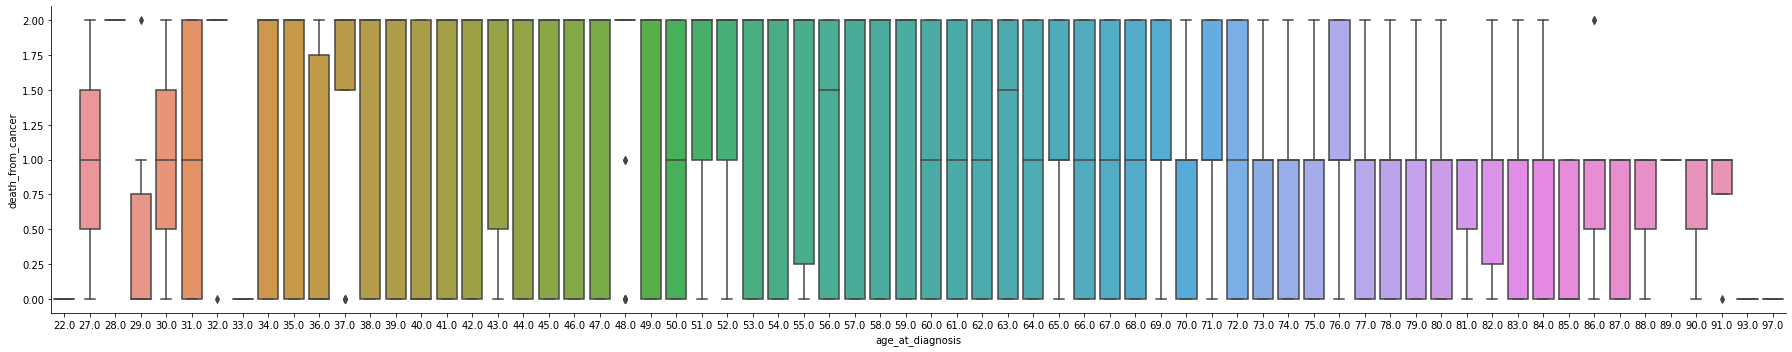

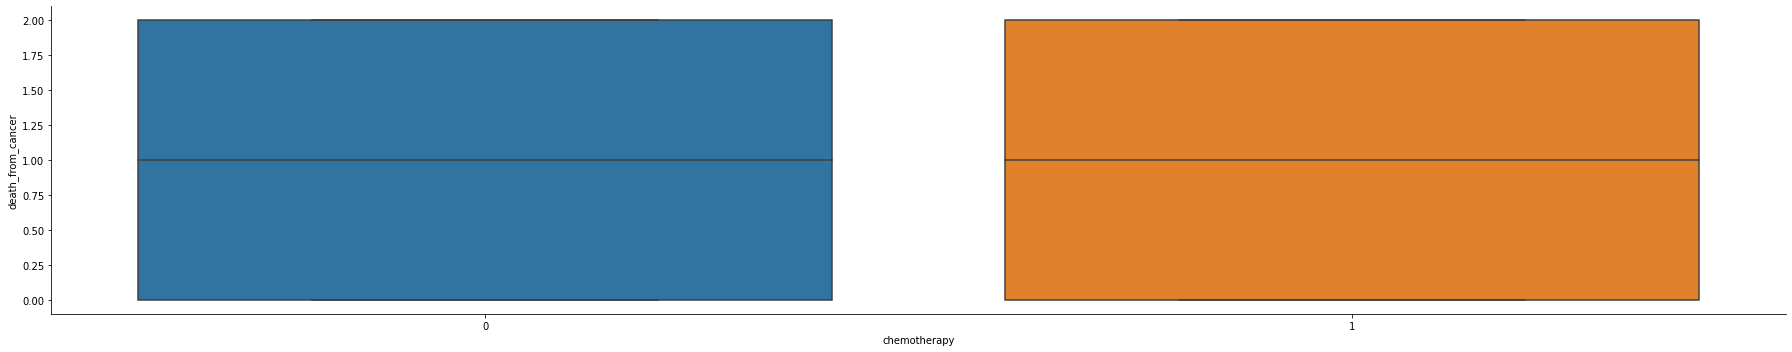

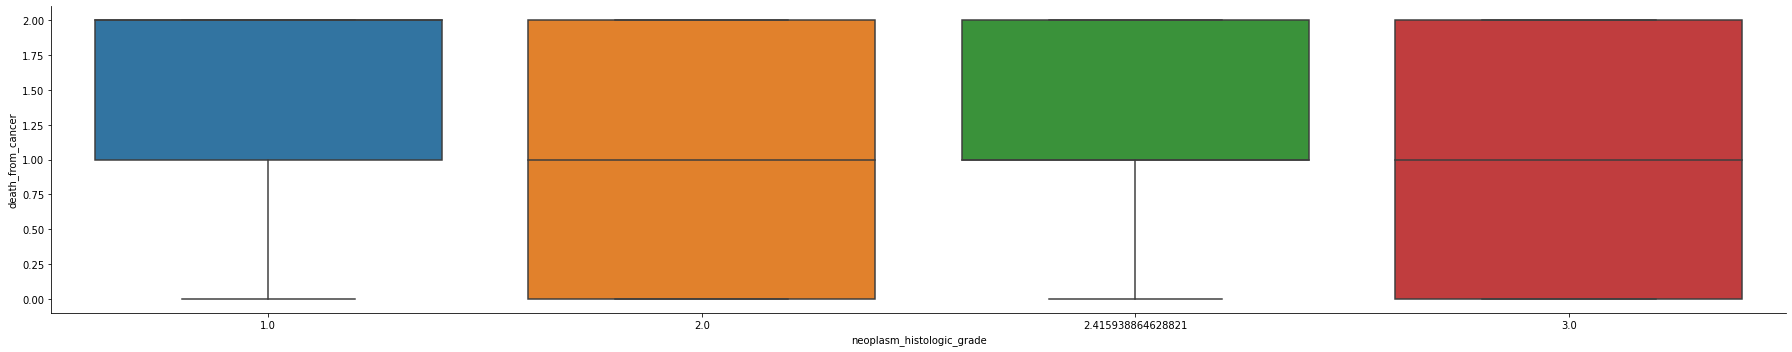

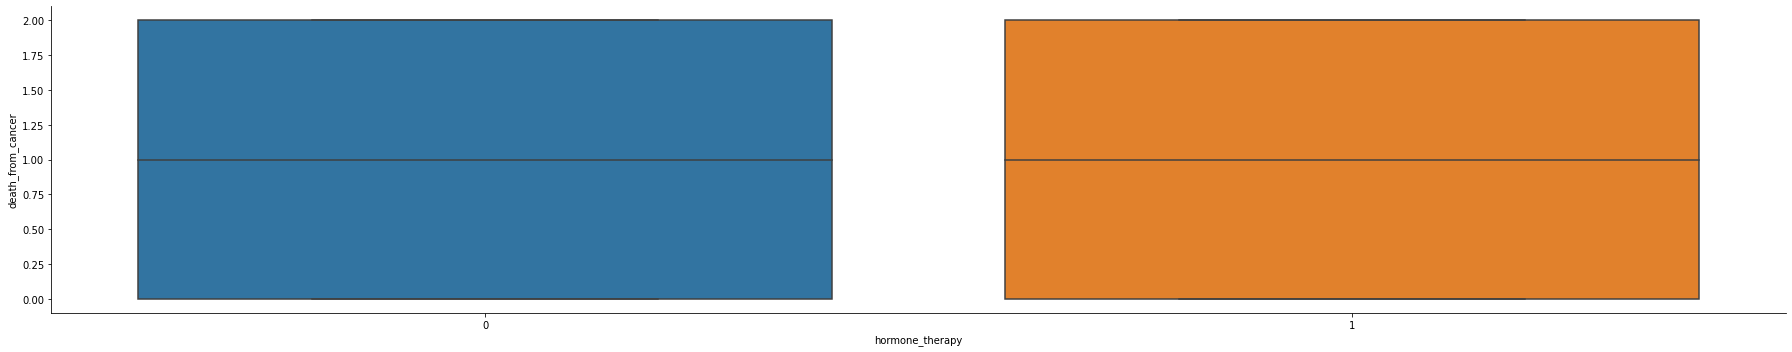

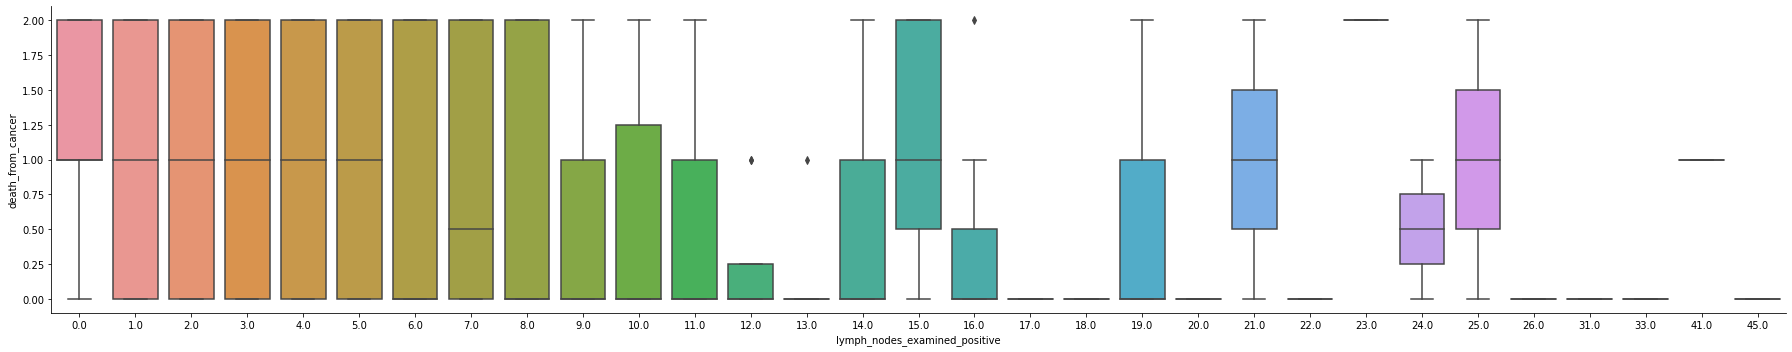

In [157]:
for column in df[df.columns[:5]]:
    sns.catplot(x=column, y='death_from_cancer', data=df, height=5, aspect=5, kind='box')
    plt.show()

# Correlation Matrix between Numerical Clinical Data

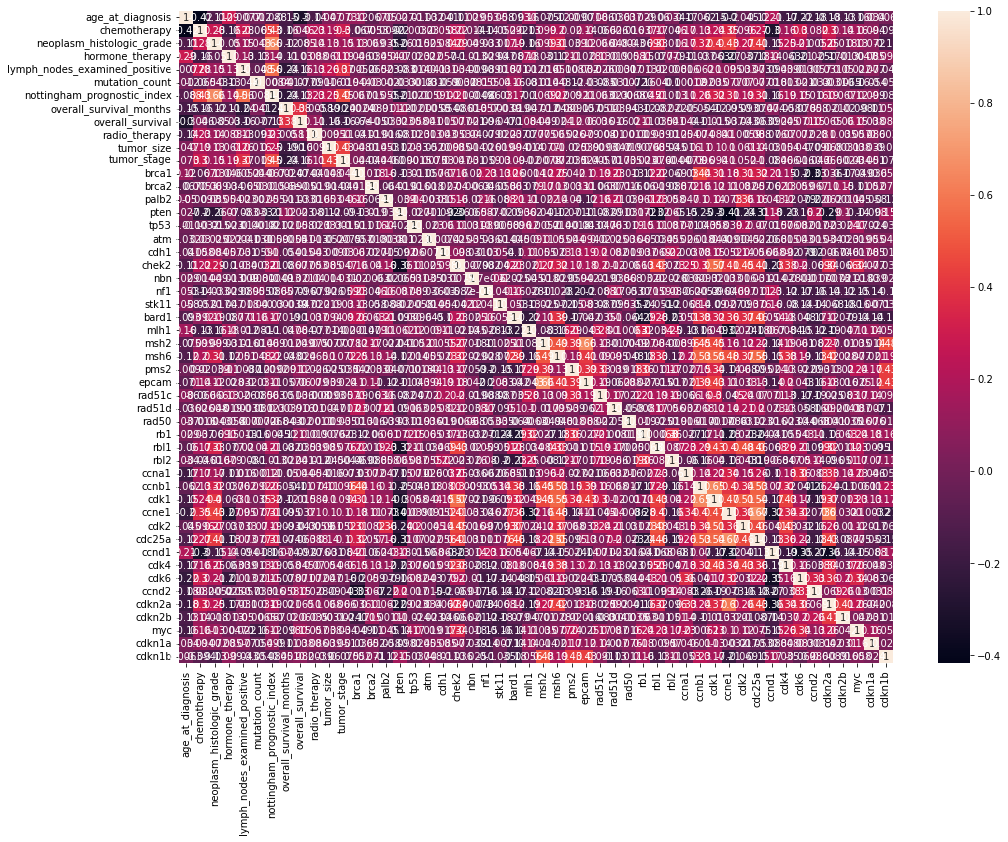

In [158]:
corr_matrix = new_clinical_data.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Update Clinical Data Set

In [159]:
new_clinical_data

,age_at_diagnosis,chemotherapy,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,...,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b
0,76.0,0,3.0,1,10.0,5.697687,7.0,140.500000,1,1,...,-1.7309,-0.8059,-1.1037,0.0744,1.4313,-0.5785,1.2180,2.5602,2.3152,-0.2487
1,44.0,0,3.0,1,0.0,2.000000,5.0,84.633333,1,1,...,-1.2643,1.1057,0.4108,-0.6040,0.0546,0.2754,-0.0952,0.7248,0.4389,1.8759
2,49.0,1,2.0,1,1.0,2.000000,5.0,163.700000,0,0,...,-0.3923,-1.2747,-0.5312,0.2585,0.8958,-0.2270,1.1899,-0.7207,1.4829,3.0696
3,48.0,1,2.0,1,3.0,1.000000,5.0,164.933333,1,1,...,-0.3827,-0.4537,-1.5248,0.3689,1.1455,0.0432,1.0868,-0.5237,0.2119,3.4617
4,77.0,1,3.0,1,8.0,2.000000,7.0,41.366667,0,1,...,1.2169,0.1169,1.7648,0.8892,-1.0195,0.3664,0.7145,0.5223,1.5638,0.1562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,44.0,0,3.0,1,1.0,4.000000,6.0,196.866667,1,1,...,-0.4420,-0.3455,0.5755,-0.0392,0.8219,0.0976,0.5315,0.4000,0.0581,0.7863
1900,43.0,0,3.0,0,1.0,6.000000,6.0,44.733333,0,1,...,0.3204,0.3448,1.1075,-0.8299,-0.2573,-0.4517,-0.1922,-0.0430,-0.6522,1.6527
1901,63.0,0,3.0,1,45.0,4.000000,7.0,175.966667,0,1,...,-0.1430,0.0064,0.9925,-0.5445,0.4552,-0.3117,-0.1528,2.0526,2.4819,1.5815
1902,62.0,0,2.0,1,12.0,15.000000,6.0,86.233333,0,0,...,-0.5244,-0.1347,0.1478,-0.6680,-0.0222,0.0307,0.1639,0.0151,-0.9559,0.4687


In [160]:
new_df = df.drop(new_clinical_data.columns, axis = 1, inplace = False)
new_df = new_df.join(new_clinical_data)
new_df.shape

(1904, 694)

#Treatment Types and Survivals

In [161]:
treatments = ['chemotherapy', 'hormone_therapy', 'radio_therapy']

In [162]:
died = new_df[new_df['overall_survival']==0]
survived = new_df[new_df['overall_survival']==1]

In [163]:
new_df[treatments]

,chemotherapy,hormone_therapy,radio_therapy
0,0,1,1
1,0,1,1
2,1,1,0
3,1,1,1
4,1,1,1
...,...,...,...
1899,0,1,1
1900,0,0,1
1901,0,1,1
1902,0,1,0


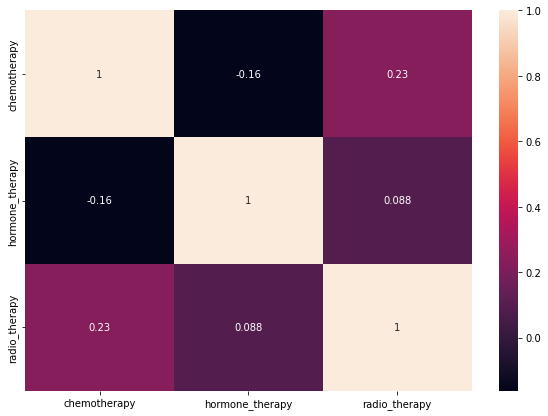

In [164]:
corr_matrix = new_df[treatments].corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True)
plt.show()

/usr/local/lib/python3.9/dist-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


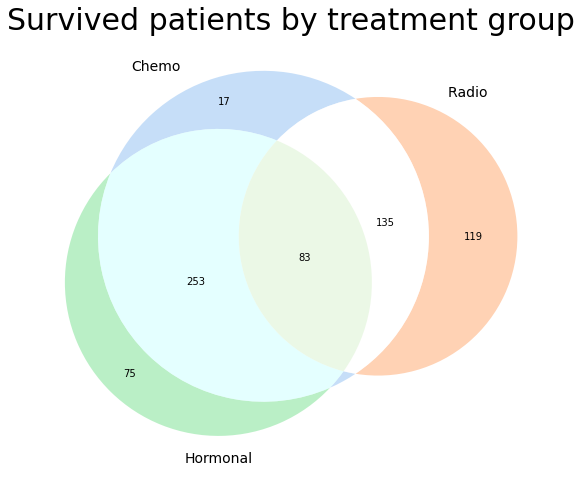

In [165]:
from matplotlib_venn import venn3

chemo = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==False)]
radio = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==False)]
hormonal = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==True)]
chemo_radio = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==False)]
radio_hormonal = survived[(survived["chemotherapy"]==False) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==True)]
hormonal_chemo = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==False) & (survived["hormone_therapy"]==True)]
all_3 = survived[(survived["chemotherapy"]==True) & (survived["radio_therapy"]==True) & (survived["hormone_therapy"]==True)]

#calculate number of people for each combination and proportion death
df_subsets = [chemo, radio, hormonal, chemo_radio, radio_hormonal, hormonal_chemo, all_3]
sizes=[]
proportiondeath=[]
for dataframe in df_subsets:
    sizes.append(np.shape(dataframe)[0])
    proportiondeath.append(np.mean(dataframe["overall_survival"]))

#set size of circles relative to size of each subset (where possible)
#set gradient of blue according to proportion of death in subset calculated above
fig, ax = plt.subplots(figsize=(10,8))
v = venn3(subsets=sizes, set_labels=("Chemo", "Radio ", "Hormonal"), ax=ax, alpha=0.6, set_colors= sns.color_palette("pastel"))

for text in v.set_labels:
    text.set_fontsize(14)
    
ax.set_title("Survived patients by treatment group", size=30)
plt.show()

In [166]:
new_df[new_df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
e2f1,1904.0,9.453782e-07,1.000264,-3.0598,-0.670000,-0.03100,0.648975,4.2781
e2f2,1904.0,-6.827731e-07,1.000262,-2.3664,-0.725800,-0.09370,0.649375,4.6230
e2f3,1904.0,-5.252101e-07,1.000263,-2.8850,-0.683775,-0.12585,0.524125,4.4802
e2f4,1904.0,-1.102941e-06,1.000263,-2.7194,-0.749075,-0.04705,0.672625,4.0720
e2f5,1904.0,6.302521e-07,1.000262,-2.8457,-0.652575,-0.12385,0.545250,5.1911
...,...,...,...,...,...,...,...,...
cdkn2a,1904.0,6.302521e-07,1.000262,-1.3569,-0.590150,-0.26300,0.165400,5.8375
cdkn2b,1904.0,9.978992e-07,1.000262,-3.0469,-0.691100,-0.07470,0.598850,4.6144
myc,1904.0,-5.777311e-07,1.000263,-2.9349,-0.684575,-0.00290,0.687250,3.3525
cdkn1a,1904.0,1.050420e-06,1.000263,-3.0976,-0.667325,-0.03395,0.555950,7.0031


**Genomic** **Data**

In [167]:
gene_data = new_df.loc[:, new_df.dtypes == object]
gene_data.head()

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
gene_col = gene_data.columns
for col in gene_col:
    new_df.loc[new_df[col] != '0', col] = 1
    new_df.loc[new_df[col] == '0', col] = 0
new_df.head()

,e2f1,e2f2,e2f3,e2f4,e2f5,e2f6,e2f7,e2f8,src,jak1,...,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b
0,0.1601,-1.8799,-1.3629,0.1992,-0.0907,-0.1167,-1.3917,-0.8178,-1.0737,1.1097,...,-1.7309,-0.8059,-1.1037,0.0744,1.4313,-0.5785,1.2180,2.5602,2.3152,-0.2487
1,-1.8984,-0.3327,-1.4560,1.0011,0.0519,-0.3793,-0.4915,-1.3693,-0.3297,0.9804,...,-1.2643,1.1057,0.4108,-0.6040,0.0546,0.2754,-0.0952,0.7248,0.4389,1.8759
2,2.2248,-1.4859,-0.4127,-0.8333,0.2885,-0.3496,-0.3549,0.0908,-0.7181,1.5835,...,-0.3923,-1.2747,-0.5312,0.2585,0.8958,-0.2270,1.1899,-0.7207,1.4829,3.0696
3,0.4610,-1.5404,-0.2119,-0.8333,1.8323,0.3869,1.3434,0.0409,-0.3804,0.6194,...,-0.3827,-0.4537,-1.5248,0.3689,1.1455,0.0432,1.0868,-0.5237,0.2119,3.4617
4,-0.2666,0.4509,-0.4449,-0.3181,2.2129,1.1063,-0.0650,1.4216,0.9720,0.0461,...,1.2169,0.1169,1.7648,0.8892,-1.0195,0.3664,0.7145,0.5223,1.5638,0.1562


In [169]:
new_df[gene_col].astype('int64')

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1900,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1902,0,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


# MinMax Scaler

In [170]:
from sklearn.preprocessing import MinMaxScaler

x = new_df.loc[:, new_df.columns != 'death_from_cancer'].values
x = MinMaxScaler().fit_transform(x) # normalizing the features
x

array([[0.43880402, 0.0696054 , 0.20666105, ..., 0.87398607, 0.53588365,
        0.36337787],
       [0.15827417, 0.29096918, 0.19402053, ..., 0.5820689 , 0.35012425,
        0.6830204 ],
       [0.7201788 , 0.12597648, 0.33567317, ..., 0.35216465, 0.45348342,
        0.86261058],
       ...,
       [0.44571335, 0.3090251 , 0.33629772, ..., 0.79325317, 0.55238746,
        0.63872841],
       [0.55688957, 0.31987009, 0.31067724, ..., 0.46919235, 0.21203481,
        0.4713095 ],
       [0.52536829, 0.37196326, 0.46901646, ..., 0.66501256, 0.30323641,
        0.49398207]])

In [171]:
normalised_df = pd.DataFrame(x)
normalised_df.head()


,0,1,2,3,4,5,6,7,8,9,...,683,684,685,686,687,688,689,690,691,692
0,0.438804,0.069605,0.206661,0.429749,0.342798,0.433558,0.067364,0.250139,0.305239,0.695284,...,0.034078,0.508509,0.266489,0.243584,0.527405,0.108195,0.556681,0.873986,0.535884,0.363378
1,0.158274,0.290969,0.194021,0.547825,0.360542,0.403215,0.178796,0.190097,0.409560,0.676266,...,0.106420,0.805604,0.384466,0.173349,0.379452,0.226885,0.385274,0.582069,0.350124,0.683020
2,0.720179,0.125976,0.335673,0.277719,0.389981,0.406646,0.195705,0.349058,0.355100,0.764973,...,0.241616,0.435650,0.311086,0.262644,0.469855,0.157053,0.553013,0.352165,0.453483,0.862611
3,0.479810,0.118179,0.362937,0.277719,0.582072,0.491750,0.405929,0.343625,0.402451,0.623169,...,0.243105,0.563247,0.233686,0.274073,0.496690,0.194610,0.539556,0.383497,0.327651,0.921601
4,0.380654,0.403082,0.331301,0.353580,0.629430,0.574877,0.231590,0.493941,0.592081,0.538845,...,0.491108,0.651928,0.489939,0.327939,0.264019,0.239534,0.490961,0.549862,0.461493,0.424294


In [172]:
normalised_df.shape

(1904, 693)

# Choose best PCA

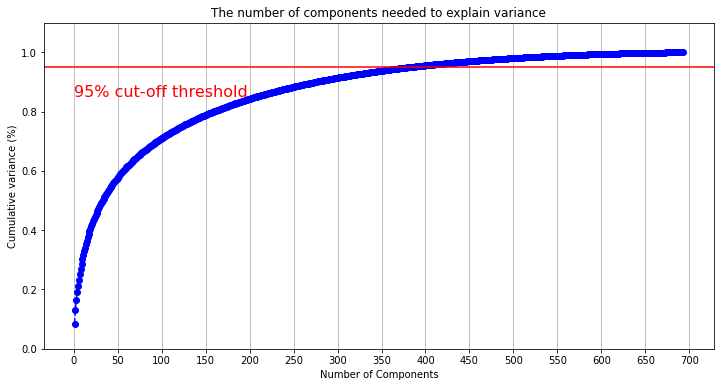

In [173]:
from sklearn.decomposition import PCA

data_rescaled = normalised_df

pca = PCA().fit(data_rescaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 694, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 750, step=50)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [223]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
principal_components = pca.fit_transform(data_rescaled)
principal_df = pd.DataFrame(data = principal_components)
principal_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.068252,-1.791739,-0.548326,0.439809,0.146514,-1.227585,0.169720,0.562697,-0.241909,0.949597,...,0.373691,-0.111904,-0.307144,-0.297825,0.321136,-0.241735,0.631957,0.350202,-0.309446,0.029970
1,-0.409633,-0.340730,1.068662,0.861870,-0.353718,0.549798,-0.003310,0.199449,-0.251043,0.570026,...,0.642776,0.328420,-0.437775,-0.393577,-0.359071,0.165918,-0.027039,0.283129,0.534896,-0.134194
2,-0.327207,-1.689418,0.772508,-1.149134,0.064266,1.478595,1.028398,-0.368855,-0.576877,0.622917,...,-0.137340,0.168878,-0.345648,0.278564,-0.128184,0.134044,-0.422025,0.126790,-0.144286,-0.134948
3,-0.405470,-1.663917,0.696746,-0.226502,-0.085330,1.108670,1.790480,0.119381,0.493806,0.608203,...,-0.350955,-0.253314,-0.291301,-0.505624,-0.285713,0.147437,0.069194,-0.427049,0.116668,-0.258173
4,0.076864,-0.142627,1.341462,-0.326869,0.093936,-0.614758,0.270330,-0.888125,0.944692,0.649768,...,0.112719,-0.068764,0.048197,-0.863234,-0.220229,-0.198202,0.460893,-0.030309,0.349820,-0.098488


In [224]:
from sklearn.model_selection import train_test_split
X = principal_df
y = new_df['death_from_cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10)
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.068252,-1.791739,-0.548326,0.439809,0.146514,-1.227585,0.169720,0.562697,-0.241909,0.949597,...,0.373691,-0.111904,-0.307144,-0.297825,0.321136,-0.241735,0.631957,0.350202,-0.309446,0.029970
1,-0.409633,-0.340730,1.068662,0.861870,-0.353718,0.549798,-0.003310,0.199449,-0.251043,0.570026,...,0.642776,0.328420,-0.437775,-0.393577,-0.359071,0.165918,-0.027039,0.283129,0.534896,-0.134194
2,-0.327207,-1.689418,0.772508,-1.149134,0.064266,1.478595,1.028398,-0.368855,-0.576877,0.622917,...,-0.137340,0.168878,-0.345648,0.278564,-0.128184,0.134044,-0.422025,0.126790,-0.144286,-0.134948
3,-0.405470,-1.663917,0.696746,-0.226502,-0.085330,1.108670,1.790480,0.119381,0.493806,0.608203,...,-0.350955,-0.253314,-0.291301,-0.505624,-0.285713,0.147437,0.069194,-0.427049,0.116668,-0.258173
4,0.076864,-0.142627,1.341462,-0.326869,0.093936,-0.614758,0.270330,-0.888125,0.944692,0.649768,...,0.112719,-0.068764,0.048197,-0.863234,-0.220229,-0.198202,0.460893,-0.030309,0.349820,-0.098488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,-0.761484,-1.681467,0.284979,0.478333,-0.341120,0.735920,0.207658,-0.603930,0.308863,0.318352,...,0.026440,-0.160151,0.257737,0.499883,0.320563,0.498223,-0.492507,0.290663,0.413149,0.308497
1900,0.884675,0.299938,1.243372,-0.756054,-0.444939,0.491130,0.136839,0.689426,0.375763,-0.235780,...,0.302485,0.088430,0.046606,-0.248380,0.108184,-0.068906,-0.079051,-0.357554,-0.146416,-0.129182
1901,-0.244623,-0.222856,1.967418,-0.498915,0.005690,-0.280662,0.490353,0.011048,-0.200670,-0.138974,...,-0.015108,-0.080840,0.359297,0.099155,-0.068499,-0.283344,-0.064803,0.522882,0.345755,-0.094744
1902,-0.668034,-0.089810,1.065133,-0.781999,0.511106,-0.246691,0.337141,0.491419,-0.528472,-0.304907,...,-0.027711,0.212421,0.287384,0.267384,0.011567,-0.241299,-0.098013,0.925908,0.081366,0.349171


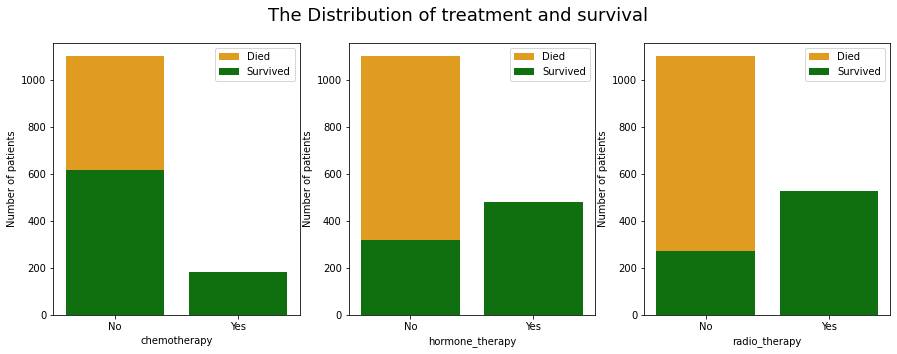

In [225]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
fig.suptitle('The Distribution of treatment and survival', fontsize = 18)

k = 0
for i in treatments:
    sns.countplot(list(died[i]), color='orange', label='Died', ax=ax[k])
    sns.countplot(x= survived[i] , color='green', label='Survived', ax=ax[k])
    ax[k].legend()
    ax[k].set(xticklabels=['No','Yes'])
    ax[k].set_xlabel(i)
    ax[k].set_ylabel('Number of patients')
    k += 1

plt.show()

In [226]:
from sklearn.metrics import accuracy_score

In [227]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C = 0.046415888336127795, penalty ='l2')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy is {}".format(accuracy_score(y_test,y_pred)*100))

Accuracy is 81.67539267015707


In [228]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
print("Accuracy is {}".format(accuracy_score(y_test,y_pred)*100))

Accuracy is 74.3455497382199


In [229]:
# K-Neighbour Classifier
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=50,weights='uniform')
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy is {}".format(accuracy_score(y_test,y_pred)*100))

Accuracy is 72.77486910994764


In [230]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=7)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy is {}".format(accuracy_score(y_test,y_pred)*100))

Accuracy is 70.68062827225131


In [231]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Accuracy is {}".format(accuracy_score(y_test,y_pred)*100))

Accuracy is 78.01047120418848


In [232]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
model1 = abc.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print("Accuracy is {}".format(accuracy_score(y_test,y_pred)*100))

Accuracy is 68.06282722513089


In [233]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
#33 120    36% 
# define model architecture
model = Sequential()
model.add(Dense(33, activation='tanh', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(150, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# evaluate model on test set
score = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/100
49/49 [==============================] - 1s 6ms/step - loss: 0.2181 - accuracy: 0.2842 - val_loss: -0.5554 - val_accuracy: 0.3372
Epoch 2/100
49/49 [==============================] - 0s 3ms/step - loss: -1.3143 - accuracy: 0.2901 - val_loss: -2.9771 - val_accuracy: 0.3430
Epoch 3/100
49/49 [==============================] - 0s 5ms/step - loss: -5.0446 - accuracy: 0.3115 - val_loss: -8.4295 - val_accuracy: 0.3488
Epoch 4/100
49/49 [==============================] - 0s 3ms/step - loss: -10.7984 - accuracy: 0.3258 - val_loss: -14.4425 - val_accuracy: 0.3721
Epoch 5/100
49/49 [==============================] - 0s 3ms/step - loss: -16.6177 - accuracy: 0.3413 - val_loss: -19.4856 - val_accuracy: 0.3837
Epoch 6/100
49/49 [==============================] - 0s 3ms/step - loss: -20.9913 - accuracy: 0.3595 - val_loss: -23.7236 - val_accuracy: 0.3953
Epoch 7/100
49/49 [==============================] - 0s 3ms/step - loss: -24.3587 - accuracy: 0.3530 - val_loss: -27.0784 - val_accuracy:

In [211]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# # Load the dataset
# df = pd.read_csv('METABRIC_RNA_Mutation.csv', low_memory=False)

# # Drop the unnecessary columns
# df = df.drop(['patient_id','cancer_type','cancer_type_detailed', 'cohort'], axis=1)

# # Replace missing values with column means
# df.fillna(df.mean(), inplace=True)

# # Convert categorical columns to one-hot encoding
# categorical_cols = ['Type_of_Breast_Surgery', 'Cancer_Type', 'Cellularity', 'Chemotherapy',
#                     'Pam50 + Claudin-low subtype', 'Cohort', 'ER_Status',
#                     'Neoplasm_Estrogen_Receptor_Status', 'Neoplasm_Progesterone_Receptor_Status',
#                     'HER2_Status', 'Inferred_Menopausal_State']
# ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(sparse=False), categorical_cols)], remainder='passthrough')
# X = ct.fit_transform(df.drop(['Mutation_Status'], axis=1))
# y = df['Mutation_Status'].cat.codes

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# # Standardize the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

#32tamh 64relu   38 
#30tanh 64relu   38.2
#26tanh 64relu   38.7
#24tanh 64relu   38.7
#24tanh 68relu   37.7
#24tanh 75relu   37.7
#26tanh 64tanh   36.1
# Define the model architecture

model = Sequential()
model.add(Dense(26, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(90, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Fit the model on the training data
history = model.fit(X_train, y_train, validation_split=0.2,batch_size=32, epochs=100, callbacks=[early_stopping])

# Evaluate the model on the testing data
accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.3f}')


Epoch 1/100
43/43 [==============================] - 2s 14ms/step - loss: 0.2058 - accuracy: 0.2540 - val_loss: -0.1882 - val_accuracy: 0.2770
Epoch 2/100
43/43 [==============================] - 0s 6ms/step - loss: -0.9537 - accuracy: 0.2482 - val_loss: -1.7868 - val_accuracy: 0.2770
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: -4.3684 - accuracy: 0.2482 - val_loss: -7.1371 - val_accuracy: 0.2770
Epoch 4/100
43/43 [==============================] - 0s 5ms/step - loss: -14.8937 - accuracy: 0.2504 - val_loss: -22.4983 - val_accuracy: 0.2886
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: -40.2744 - accuracy: 0.2832 - val_loss: -55.0263 - val_accuracy: 0.2974
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: -88.0798 - accuracy: 0.3234 - val_loss: -113.5383 - val_accuracy: 0.2974
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: -166.9919 - accuracy: 0.3504 - val_loss: -204.6258 - val_accur